# Import of load curves

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

sys.path.append(os.path.join(project_root, 'Modules'))

belgian_data_folder = os.path.join(project_root, 'Data', 'Belgian_model')
demand_plot_folder = os.path.join(project_root, 'Plots', 'Demand plot')

In [2]:
demand_elec = ['demand_el','demand_el_ht','demand_el_tr']
demand_elec_name = ['Electrical loads demand','Electrical heating demand','Electrical light vehicle transport demand']

demand_ng = ['demand_ng_ht','demand_ng_id','demand_ng_tr','demand_ng_tr2']
demand_ng_name = ['Natural gas heating demand','Natural gas industry demand','Natural gas light vehicle transport demand', 'Natural gas heavy vehicle transport demand']

demand_h2 = ['demand_h2_ht','demand_h2_id','demand_h2_tr','demand_h2_tr2']
demand_h2_name = ['Hydrogen heating demand','Hydrogen industry demand','Hydrogen light vehicle transport demand', 'Hydrogen heavy vehicle transport demand']

demands = dict() 

- Electricity demands:

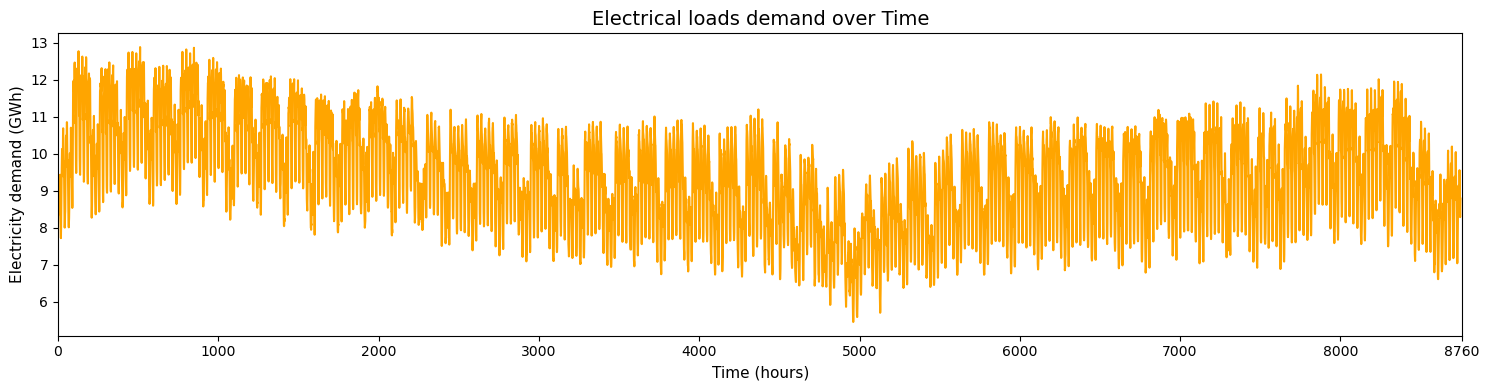

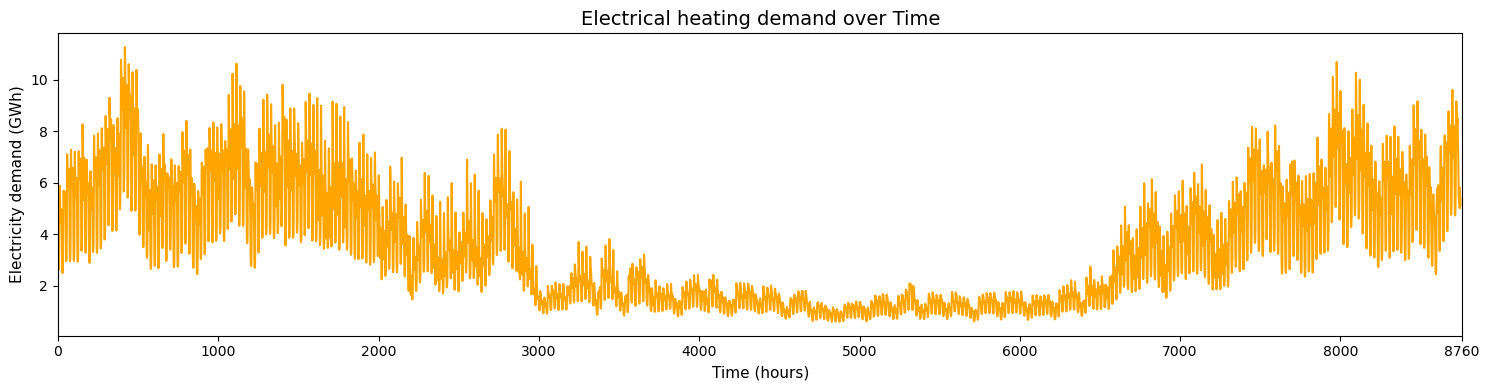

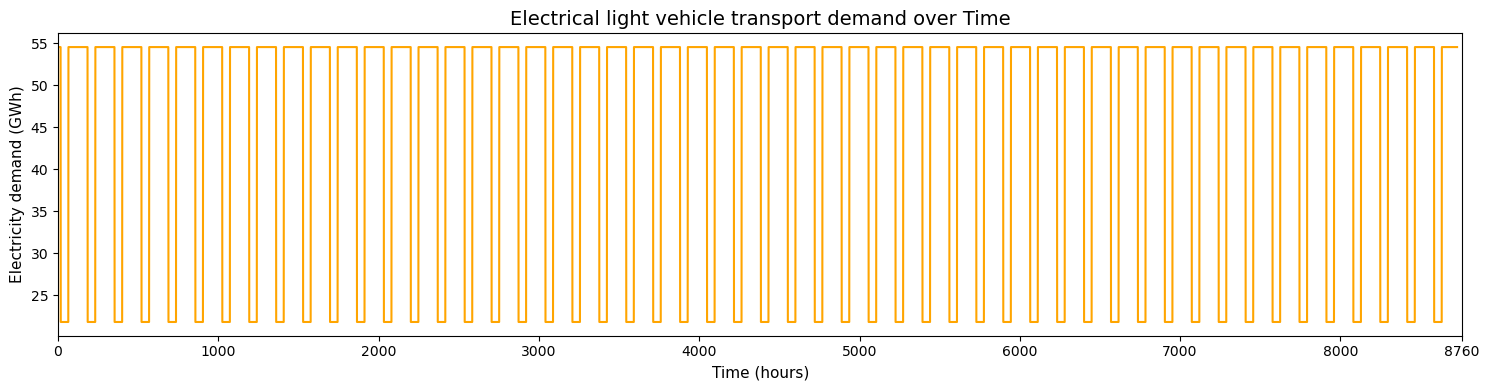

In [3]:
for demand in demand_elec:
    df = pd.read_csv(os.path.join(belgian_data_folder, demand + '.csv'))
    demands[demand] = df.values.tolist()
    pd.DataFrame(demands[demand]).to_csv(os.path.join(belgian_data_folder, demand + '.csv'), index=False, header=False)
    plt.figure(figsize=(15, 4))
    plt.plot(demands[demand], color='orange')
    plt.xlabel('Time (hours)', fontsize=11)
    plt.xticks(np.append(np.arange(0, len(demands[demand]), 1000), 8760))
    plt.xlim(0, 8761)
    plt.ylabel('Electricity demand (GWh)', fontsize=11)
    plt.title(f'{demand_elec_name[demand_elec.index(demand)]} over Time', fontsize=14)
    demands[demand] = [demands[demand][i][0] for i in range(len(demands[demand]))]
    plt.tight_layout()
    plt.savefig(os.path.join(demand_plot_folder, f'{demand_elec_name[demand_elec.index(demand)]}.pdf'), dpi=600)
    plt.show()

- Natural gas demands: 

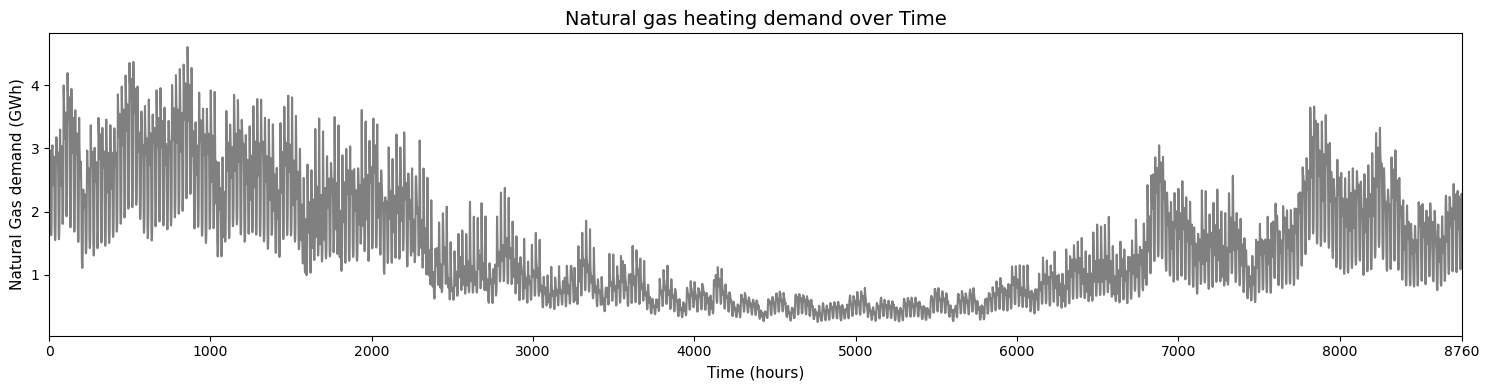

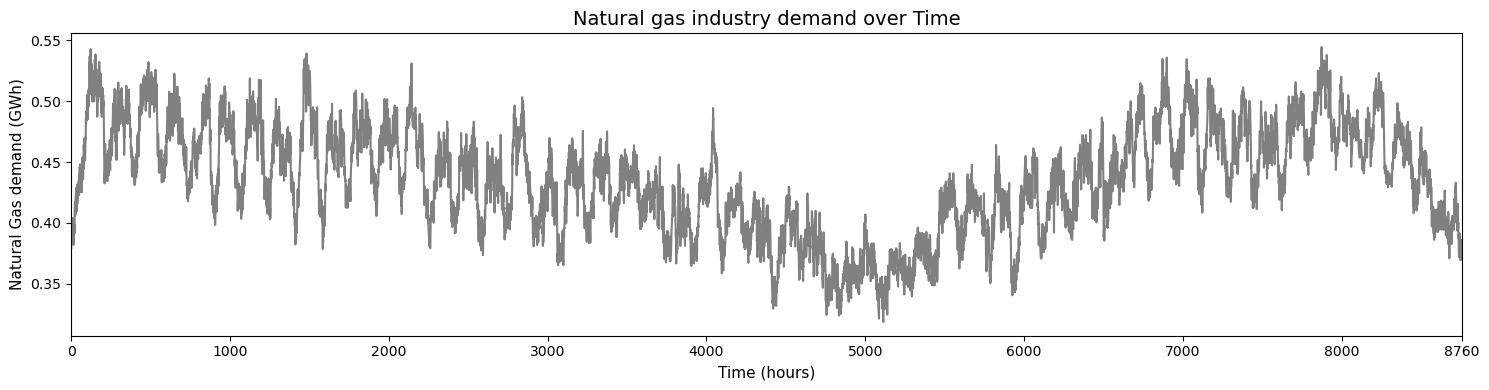

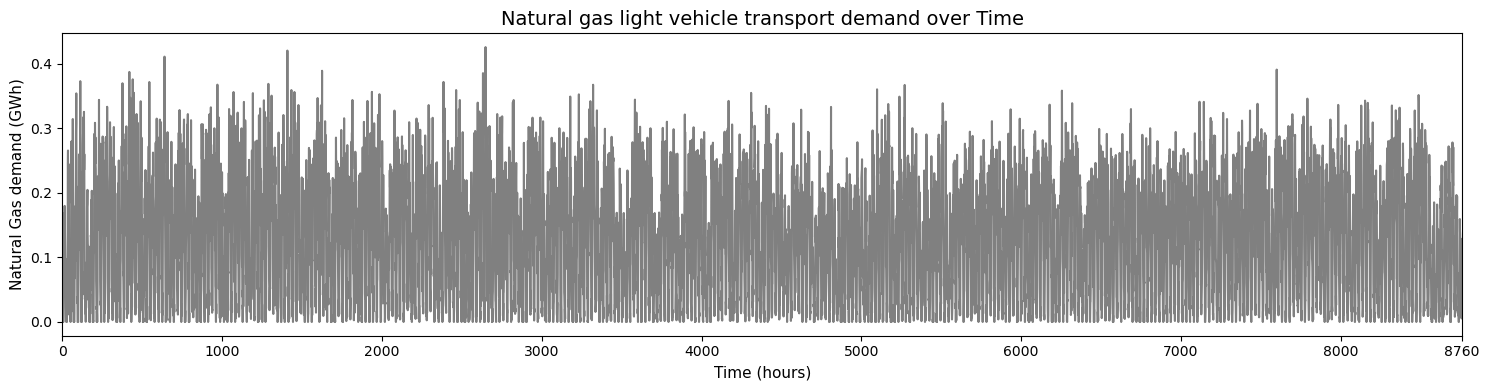

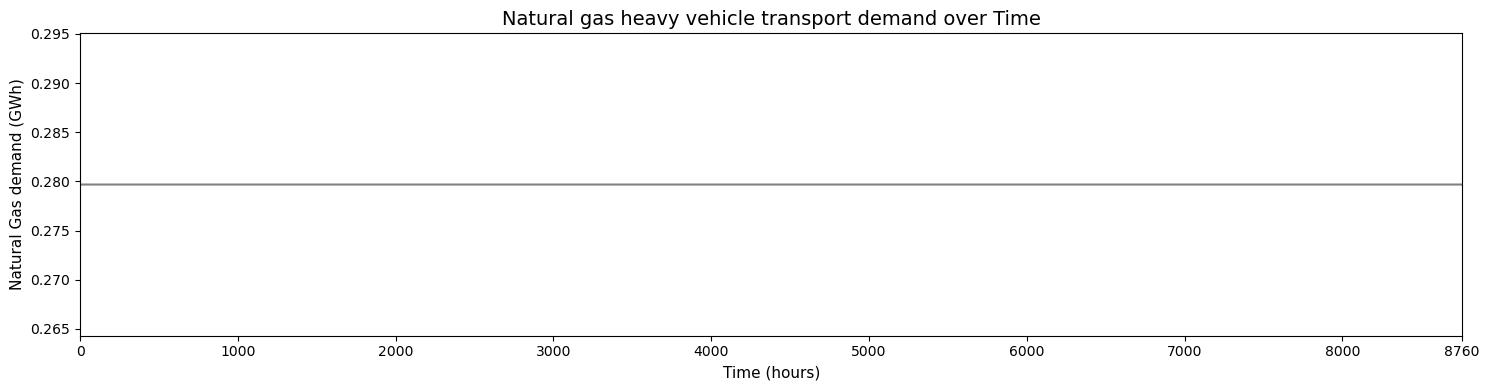

In [4]:
for demand in demand_ng:
    df = pd.read_csv(os.path.join(belgian_data_folder, demand + '.csv'))
    demands[demand] = df.values.tolist()
    plt.figure(figsize=(15, 4))
    plt.plot(demands[demand], color='gray')
    plt.xlabel('Time (hours)', fontsize=11)
    plt.xticks(np.append(np.arange(0, len(demands[demand]), 1000), 8760))
    plt.xlim(0, 8761)
    plt.ylabel('Natural Gas demand (GWh)', fontsize=11)
    plt.title(f'{demand_ng_name[demand_ng.index(demand)]} over Time', fontsize=14)
    demands[demand] = [demands[demand][i][0] for i in range(len(demands[demand]))]
    plt.tight_layout()
    plt.savefig(os.path.join(demand_plot_folder, f'{demand_ng_name[demand_ng.index(demand)]}.pdf'), dpi=600)
    plt.show()

- Hydrogen demands:

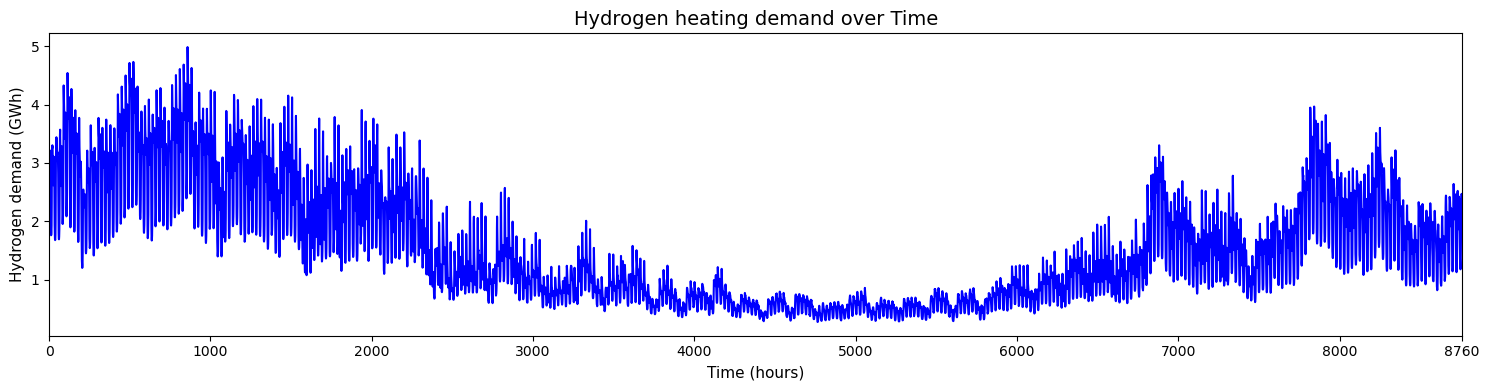

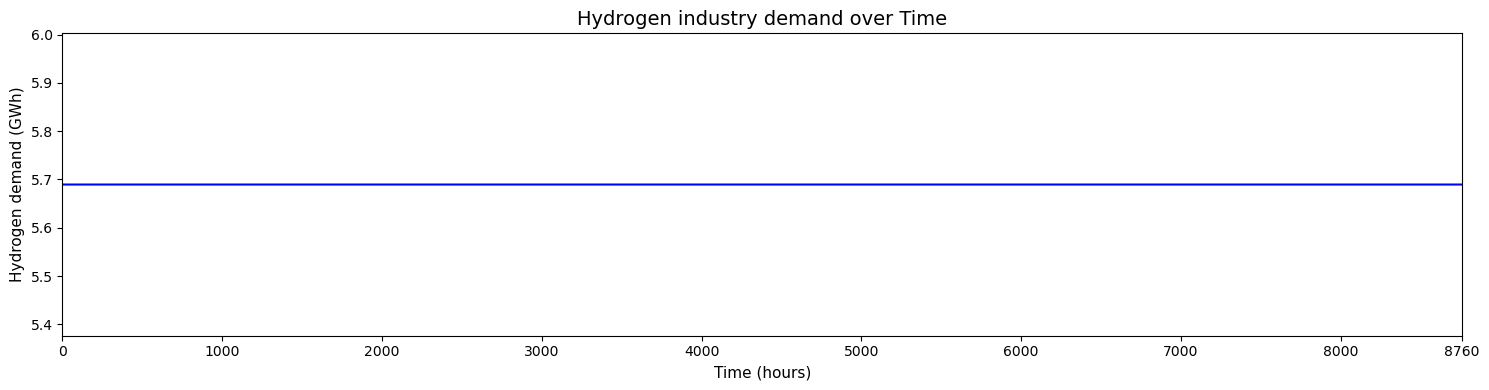

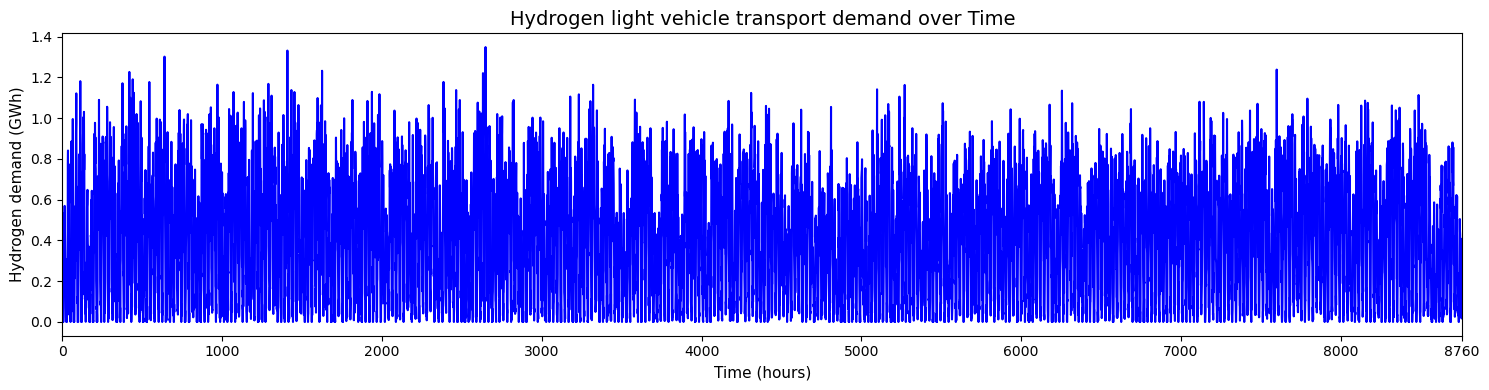

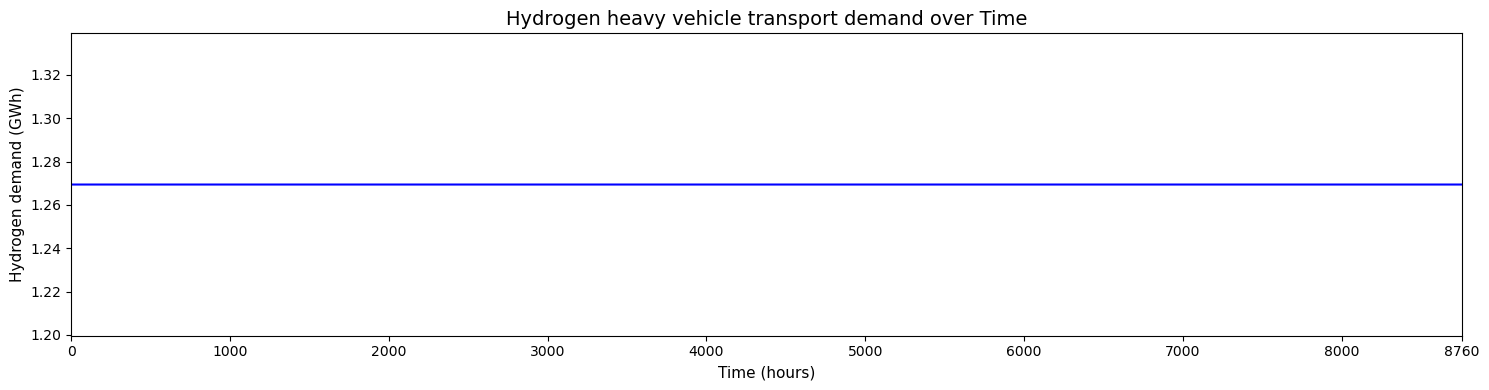

In [5]:
for demand in demand_h2:
    df = pd.read_csv(os.path.join(belgian_data_folder, demand + '.csv'))
    demands[demand] = df.values.tolist()
    plt.figure(figsize=(15, 4))
    plt.plot(demands[demand], color='blue')
    plt.xlabel('Time (hours)', fontsize=11)
    plt.xticks(np.append(np.arange(0, len(demands[demand]), 1000), 8760))
    plt.xlim(0, 8761)
    plt.ylabel('Hydrogen demand (GWh)', fontsize=11)
    plt.title(f'{demand_h2_name[demand_h2.index(demand)]} over Time', fontsize=14)
    demands[demand] = [demands[demand][i][0] for i in range(len(demands[demand]))]
    plt.tight_layout()
    plt.savefig(os.path.join(demand_plot_folder, f'{demand_h2_name[demand_h2.index(demand)]}.pdf'), dpi=600)
    plt.show()

# Fusion by energy vector

In [6]:
demand_vector = dict()
demand_vector['Electricity'] = [demands['demand_el'][i] + demands['demand_el_ht'][i] for i in range(0, len(demands['demand_el']))]
demand_vector['Hydrogen'] = [demands['demand_h2_ht'][i] + demands['demand_h2_id'][i] + demands['demand_h2_tr'][i] + demands['demand_h2_tr2'][i] for i in range(0, len(demands['demand_h2_ht']))]
demand_vector['Natural gas'] = [demands['demand_ng_ht'][i] + demands['demand_ng_id'][i] + demands['demand_ng_tr'][i] + demands['demand_ng_tr2'][i] for i in range(0, len(demands['demand_ng_ht']))]

# Hourly load curves

## Winter days

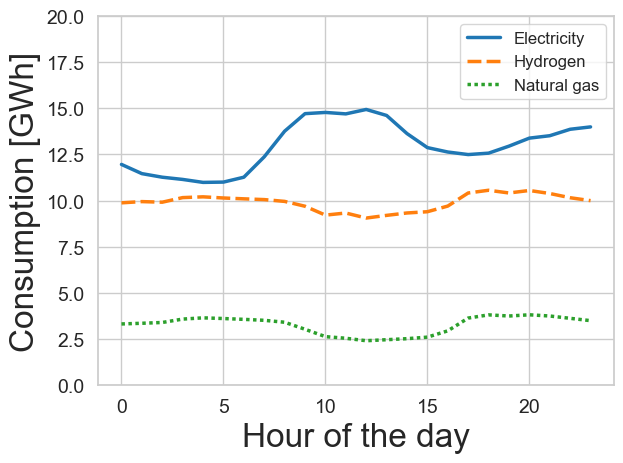

In [7]:
start = 0*24
days = 1

load_curves = dict()
vectors = ['Electricity', 'Hydrogen', 'Natural gas']
for vector in vectors:
    load_curves[vector] = demand_vector[vector][start:start+24*days]

sns.set_theme(style="whitegrid")
sns.lineplot(data=load_curves, palette="tab10", linewidth=2.5)
plt.xlabel("Hour of the day", fontsize = 24)
plt.ylabel("Consumption [GWh]", fontsize = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12)
plt.ylim(0,20)
plt.tight_layout()
plt.savefig(os.path.join(demand_plot_folder, f'demands_on_a_winter_day.pdf'), dpi=600)
plt.show()

## Summer days

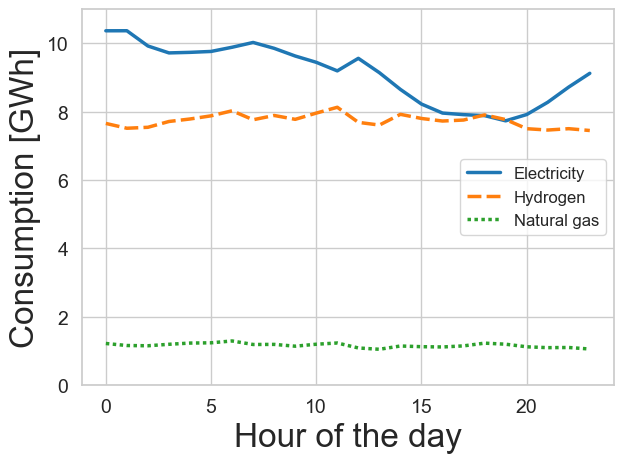

In [8]:
start = 197*24
days = 1

load_curves = dict()
vectors = ['Electricity', 'Hydrogen', 'Natural gas']
for vector in vectors:
    load_curves[vector] = demand_vector[vector][start:start+24*days]

sns.set_theme(style="whitegrid")
sns.lineplot(data=load_curves, palette="tab10", linewidth=2.5)
plt.xlabel("Hour of the day", fontsize = 24)
plt.ylabel("Consumption [GWh]", fontsize = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 12)
plt.ylim(0,11)
plt.tight_layout()
plt.savefig(os.path.join(demand_plot_folder, f'demands_on_a_summer_day.pdf'), dpi=600)
plt.show()